<a href="https://colab.research.google.com/github/Raziel10/AlgorithmsAndMore/blob/master/ML%5CKNN%5CKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors classifier
by Raziel Lopez Escamilla

##Introduction.

The KNN algorithm is a classification method (supervised machine learning algorithm), using an already labeled set of data (training set), the method will classify a new input by comparing it with all exiisting data. Then it will look at the labels of the K most similar values, and the majority label from the K elements will be the label assigned to the input.

*   Pros: High accuracy, insensitive to outliers, no assumptions about data.
*   Cons: Computational expensive, requires a lot of memory.

> Process: 
1.   Have existing set or example data (training set).
2.   Label all training set.
3.   Give a new piece of data (without label). 
4.   Compare new piece with every existing data.
5.   Take the most similar pieces of data (nearest neighbors) and look at their labels.
6.   Look at the top K most similar pieces.
7.   Take the majority vote from K pieces and that will be the label assigned.

Note: K is usually less than 20.

In [ ]:
from numpy import *
import operator # used for sorting 

In [ ]:
def createDataSet ():
  group = array([[1.0,1.1], [1.0,1.0], [0,0], [0,0.1]])
  labels = ['A','A','B','B']
  return group, labels

In [ ]:
group,labels = createDataSet()

In [ ]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [ ]:
labels

['A', 'A', 'B', 'B']

For every point in our dataset:
  calculate the distance between inX and the current point 
  sort the distances in increasing order
  take k items with longest distances to inX
  find the majority class among these items
  return the majority class as our prediction for the class of inX

In [ ]:
def classify0_exp( inX, dataSet, labels, k):
  #distance calculation
  dataSetSize = dataSet.shape[0]
  print("dataSetSize:")
  print(str(dataSetSize))
  tileMat = tile(inX, (dataSetSize, 1)) #Construct an array by repeating A the number of times given by reps.
  print("tileMat:")
  print(str(tileMat))
  diffMat = tileMat - dataSet
  print("diffMat:")
  print(str(diffMat))
  sqDiffMat = diffMat**2
  print("sqDiffMat:")
  print(str(sqDiffMat))
  sqDistances = sqDiffMat.sum(axis = 1)
  print("sqDistances:")
  print(str(sqDistances))
  distances = sqDistances**0.5
  print("distances:")
  print(str(distances))
  sortedDistIndicies = distances.argsort()
  print("sortedDistIndicies:")
  print(str(sortedDistIndicies))
  classCount = {}
  #voting with lowest k distances
  for i in range(k):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
  #Sorted dictionary
  sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True )
  print("sortedClassCount:")
  print(str(sortedClassCount))
  return sortedClassCount[0][0]


In [ ]:
def classify0( inX, dataSet, labels, k):
  #distance calculation
  dataSetSize = dataSet.shape[0]
  tileMat = tile(inX, (dataSetSize, 1)) #Construct an array by repeating A the number of times given by reps.
  diffMat = tileMat - dataSet
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis = 1)
  distances = sqDistances**0.5
  sortedDistIndicies = distances.argsort()
  classCount = {}
  #voting with lowest k distances
  for i in range(k):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
  #Sorted dictionary
  sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True )
  return sortedClassCount[0][0]


In [ ]:
classify0_exp([1,1], group, labels, 3)

dataSetSize:
4
tileMat:
[[1 1]
 [1 1]
 [1 1]
 [1 1]]
diffMat:
[[ 0.  -0.1]
 [ 0.   0. ]
 [ 1.   1. ]
 [ 1.   0.9]]
sqDiffMat:
[[0.   0.01]
 [0.   0.  ]
 [1.   1.  ]
 [1.   0.81]]
sqDistances:
[0.01 0.   2.   1.81]
distances:
[0.1        0.         1.41421356 1.3453624 ]
sortedDistIndicies:
[1 0 3 2]
sortedClassCount:
[('A', 2), ('B', 1)]


'A'

In [ ]:
classify0_exp([0,0], group, labels, 3)

dataSetSize:
4
tileMat:
[[0 0]
 [0 0]
 [0 0]
 [0 0]]
diffMat:
[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]
sqDiffMat:
[[1.   1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]
sqDistances:
[2.21 2.   0.   0.01]
distances:
[1.48660687 1.41421356 0.         0.1       ]
sortedDistIndicies:
[2 3 1 0]
sortedClassCount:
[('B', 2), ('A', 1)]


'B'

In [ ]:
def file2matrix (filename): 
  love_dictionary={'largeDoses':3, 'smallDoses':2, 'didntLike':1, '3':3, '2':2, '1':1}
  fr = open(filename)
  #get number of lines
  numberOfLines = len(fr.readlines())
  #create numpy matrix to return
  returnMat = zeros((numberOfLines, 3))
  classLabelVector = []
  fr = open(filename)
  index = 0
  #parse lines into lists
  for line in fr.readlines():
      line = line.strip()
      listFromLine = line.split('\t')
      returnMat[index,:] = listFromLine[0:3]
      classLabelVector.append(love_dictionary.get(listFromLine[-1]))
      index += 1
  return returnMat, classLabelVector

In [ ]:
datingDataMat, datingLabels = file2matrix("datingTestSet.txt")

In [ ]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

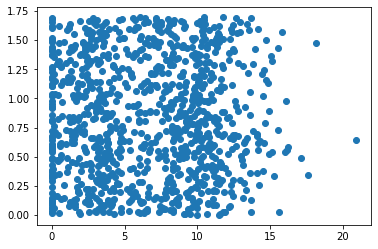

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) #numero de fila, num columnas, posicion
ax.scatter(datingDataMat[:,1], datingDataMat[:,2])
plt.show()

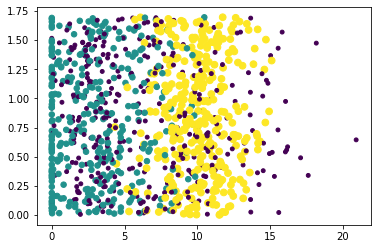

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #numero de fila, num columnas, posicion
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0 * array(datingLabels),15.0 * array(datingLabels) )
plt.show()

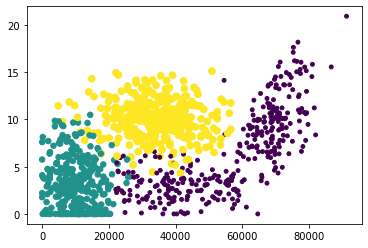

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) #numero de fila, num columnas, posicion
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0 * array(datingLabels),15.0 * array(datingLabels) )
plt.show()

In [ ]:
def autoNorm (dataSet):
  minVals = dataSet.min(0)
  maxVals = dataSet.max(0)
  ranges = maxVals - minVals
  #print(shape(dataSet))
  normDataSet = zeros(shape(dataSet))
  m = dataSet.shape[0]
  #print(m)
  normDataSet = dataSet - tile(minVals, (m,1) )
  normDataSet = normDataSet / tile(ranges, (m,1))
  return normDataSet , ranges , minVals


In [ ]:
normMat , ranges, minVals = autoNorm(datingDataMat)

In [ ]:
normMat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [ ]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [ ]:
minVals

array([0.      , 0.      , 0.001156])

# Dating test example

In [ ]:
def datingClassTest(hoRatio, k):  
    #hoRatio = 0.10  
    datingDataMat2,datingLabels2 = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat2, ranges2, minVals2 = autoNorm(datingDataMat2)
    m = normMat2.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat2[i,:],normMat2[numTestVecs:m,:],datingLabels2[numTestVecs:m],k)
        #print("the classifier came back with: {0}, the real answer is: {1}".format(classifierResult, datingLabels2[i]))
        if (classifierResult != datingLabels2[i]): 
          errorCount += 1.0
    print("for k = {1}, and hoRatio = {2} the total error rate is: {0}".format(errorCount/float(numTestVecs), k, hoRatio ))

In [ ]:
datingClassTest(0.10,3)
datingClassTest(0.20,3)
datingClassTest(0.30,3)
datingClassTest(0.10,4)
datingClassTest(0.20,4)
datingClassTest(0.30,4)
datingClassTest(0.10,4)
datingClassTest(0.20,4)
datingClassTest(0.30,4)

for k = 3, and hoRatio = 0.1 the total error rate is: 0.05
for k = 3, and hoRatio = 0.2 the total error rate is: 0.08
for k = 3, and hoRatio = 0.3 the total error rate is: 0.08333333333333333
for k = 4, and hoRatio = 0.1 the total error rate is: 0.04
for k = 4, and hoRatio = 0.2 the total error rate is: 0.08
for k = 4, and hoRatio = 0.3 the total error rate is: 0.07666666666666666
for k = 4, and hoRatio = 0.1 the total error rate is: 0.04
for k = 4, and hoRatio = 0.2 the total error rate is: 0.08
for k = 4, and hoRatio = 0.3 the total error rate is: 0.07666666666666666


In [ ]:
def classifyPerson():
  resultList = ['not at all', 'in small doses', 'in larger doses']
  percentTats = float(input("percentage of time spent playing videogames? "))
  ffMiles = float(input("frequent flier miles earned per year? "))
  iceCream = float(input(" liters of ice cream consumed per year?"))
  datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
  normMat, ranges, minVals = autoNorm(datingDataMat)
  inArr = array( [ffMiles , percentTats, iceCream])
  classifierResult = classify0((inArr - minVals )/ ranges, normMat, datingLabels, 3)
  print("You will probably like this person: {0}".format(resultList[classifierResult - 1]))


In [ ]:
classifyPerson()

percentage of time spent playing videogames? 20
frequent flier miles earned per year? 20000
 liters of ice cream consumed per year?2
3
You will probably like this person: in larger doses


# **Hand writting recognition system.**

In [ ]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [ ]:
testVector = img2vector("digits/testDigits/0_13.txt")
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('digits/testDigits')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print("the classifier came back with: {0}, the real answer is: {0}".format(classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: {0}".format( errorCount))
    print("\nthe total error rate is: {0}".format(errorCount/float(mTest)))

In [ ]:
handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answe

##Conclusion.


This classifier is a good option to classify elements when there is a small amount of information already classified (labeled) due to its computational complexity, it the simplest classification method an easy to understand, it also is important to consider that the value assigned to K will affect directly to our error rate, for that reason it is important to evaluate multiple K values to find the more accurate.